In [1]:
#from __future__ import division, print_function
from itertools import product, chain
import sympy as sy
import numpy as np
from sigmd.signals import e_field, signals_for_order, phase_cycle, weights
from sigmd.filters import action, contains_filter, multifilter

In [5]:
sy.init_printing() # pretty!

In [18]:
def single_interactions(k):
    return len(set(map(abs, k))) == len(k)

def conventional(k):
    return k[-1]/abs(k[-1]) == 1

f = multifilter([single_interactions, action, conventional])

In [19]:
sigs = sum(sum(signals_for_order(i, 4, filters=f))for i in [2,4])
len(sigs.args)

c:\work\src\sig2d\src\sigmd\signals.py:146: UserWarning: Signals for order now doesn't do the sum
  warnings.warn("Signals for order now doesn't do the sum")


In [20]:
sigs

# Warren's 16 step

In [29]:
sigs = sum(sum(signals_for_order(i, 3, filters=action))for i in [1,2,3,4])
len(sigs.args)

c:\work\src\sig2d\src\sigmd\signals.py:146: UserWarning: Signals for order now doesn't do the sum
  warnings.warn("Signals for order now doesn't do the sum")


In [33]:
phases = []
for i, j in product(range(4), range(4)):
    phases.append([0, i*sy.pi*2/4, j*sy.pi*2/4])
phases

In [37]:
alpha_r = (-1, 2, -1)
weights(alpha_r, phases)
cycled = phase_cycle(sigs, phases, weights=weights(alpha_r, phases)).expand()

In [41]:
cycled

In [42]:
phase_cycle(sigs, phases, weights=weights((1, 0, -1), phases)).expand()

# Tan's 1x3x3x3

In [52]:
sigs = sum(sum(signals_for_order(i, 4, filters=action))for i in [1,2,3,4])

c:\work\src\sig2d\src\sigmd\signals.py:146: UserWarning: Signals for order now doesn't do the sum
  warnings.warn("Signals for order now doesn't do the sum")


In [53]:
phases = []
M, L, K = (3,3,3)
for i, j, k in product(range(M), range(L), range(K)):
    phases.append([0, i*sy.pi*2/M, j*sy.pi*2/L, k*sy.pi*2/K])
phases

In [54]:
alpha_r = (-1, 1, 1, -1)
w_r = weights(alpha_r, phases)
cycled_r = sy.re(phase_cycle(sigs, phases, w_r).expand()).expand()

In [55]:
len(cycled_r.args)

In [56]:
cycled_r.args[:10]

In [25]:
sy.re(cycled_r.expand())

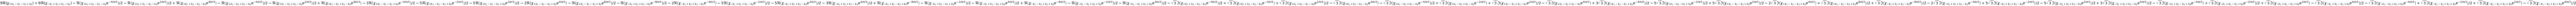

In [17]:
sy.re(cycled_r).expand()